In [ ]:
import sys
sys.path.append("../")

In [ ]:
import tensorflow as tf
import keras
from draw_candle_image import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta.trend
from ta import add_all_ta_features
from ta.utils import dropna
import ta
import ta.momentum
import json
from common_train_utils import *
from functools import partial
from keras.models import load_model
from matplotlib.dates import DateFormatter

from draw_image_utils import draw_prediction

In [4]:
dataset_folder = "./fpt_dataset_10_4_3_2014_2024_test_"

In [5]:
config = read_config(dataset_folder)
candle_type_and_directory_save: dict = config["candle_type_and_directory_save"]
previous_days = config["previous_days"]
next_days = config["next_days"]
days_result = config["days_result"]

In [6]:
model_name = "model_5"
prefix_of_folder = "dataset_test_1"
dataset_test_folder = f"{prefix_of_folder}_of_{model_name}"
dataset_test = tf.data.Dataset.load(f'{dataset_folder}/{dataset_test_folder}')

In [7]:
transform_function = partial(get_open_close_prices_percent_of_last_days_result, days_result)
dataset_test_1 = dataset_test.map(transform_function)

In [8]:
dataset_test

<_LoadDataset element_spec=(TensorSpec(shape=(None, 287, 287, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 18, 4), dtype=tf.float64, name=None))>

In [9]:
dataset_test_1

<_MapDataset element_spec=(TensorSpec(shape=(None, 287, 287, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 3, 2), dtype=tf.float64, name=None))>

In [10]:
# model_1.save(f"{dataset_folder}/model_1.keras")
model = load_model(f"{dataset_folder}/{model_name}.keras")

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 286, 286, 8)    │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 143, 143, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 141, 141, 8)    │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 70, 70, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 39200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     1,254,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 3, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 3, 64)          │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 3, 2)           │           130 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,843,415 (14.66 MB)

 Trainable params: 1,281,138 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,562,277 (9.77 MB)

In [12]:
loss, mae = model.evaluate(dataset_test_1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 324ms/step - loss: 0.5406 - mean_absolute_error: 0.5024


In [13]:
loss

0.549911379814148

In [14]:
mae

0.5019308924674988

In [15]:
prediction_for_test = model.predict(dataset_test_1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 302ms/step


In [16]:
prediction_for_test

array([[[-0.14892116, -0.2951456 ],
        [-0.2785862 , -0.44579494],
        [-0.2636477 , -0.38401258]],

       [[-0.12624861, -0.04554398],
        [ 0.03844529,  0.07996047],
        [ 0.26953533,  0.22449172]],

       [[ 0.03371635,  0.17881998],
        [-0.21102959, -0.29775897],
        [-0.5907363 , -0.6093326 ]],

       ...,

       [[-1.9456656 , -1.0701286 ],
        [ 0.64489543,  1.3507062 ],
        [ 1.0291502 ,  0.869011  ]],

       [[-2.2868521 , -2.007804  ],
        [ 0.294318  ,  0.83135515],
        [ 3.6318767 ,  2.0771413 ]],

       [[ 0.6445053 ,  0.50485367],
        [ 0.66156304,  0.67738914],
        [ 0.18275174, -0.08331252]]], dtype=float32)

In [17]:
all_y_dataset_test = [y.numpy() for _, y in dataset_test]
y_dataset_test = all_y_dataset_test[0]
for y in all_y_dataset_test[1:]:
    y_dataset_test = np.concatenate([y_dataset_test, y], axis=0)
    
all_x_dataset_test = [x.numpy() for x, _ in dataset_test]
x_dataset_test = all_x_dataset_test[0]
for x in all_x_dataset_test[1:]:
    x_dataset_test = np.concatenate([x_dataset_test, x], axis=0)

In [18]:
all_y_dataset_test_1 = [y.numpy() for _, y in dataset_test_1]
y_dataset_test_1 = all_y_dataset_test_1[0]
for y in all_y_dataset_test_1[1:]:
    y_dataset_test_1 = np.concatenate([y_dataset_test_1, y], axis=0)
    
all_x_dataset_test_1 = [x.numpy() for x, _ in dataset_test_1]
x_dataset_test_1 = all_x_dataset_test_1[0]
for x in all_x_dataset_test_1[1:]:
    x_dataset_test_1 = np.concatenate([x_dataset_test_1, x], axis=0)

In [19]:
y_dataset_test.shape

(272, 18, 4)

In [20]:
x_dataset_test.shape

(272, 287, 287, 3)

In [21]:
y_dataset_test_1.shape

(272, 3, 2)

In [22]:
x_dataset_test_1.shape

(272, 287, 287, 3)

real: [[-1.69902913 -0.73937153]
 [ 2.90123457  0.        ]
 [ 0.89982004  3.28988206]]
prediction: [[-1.1581521 -1.034503 ]
 [ 2.482799   0.3469201]
 [ 0.9947079  3.1415997]]


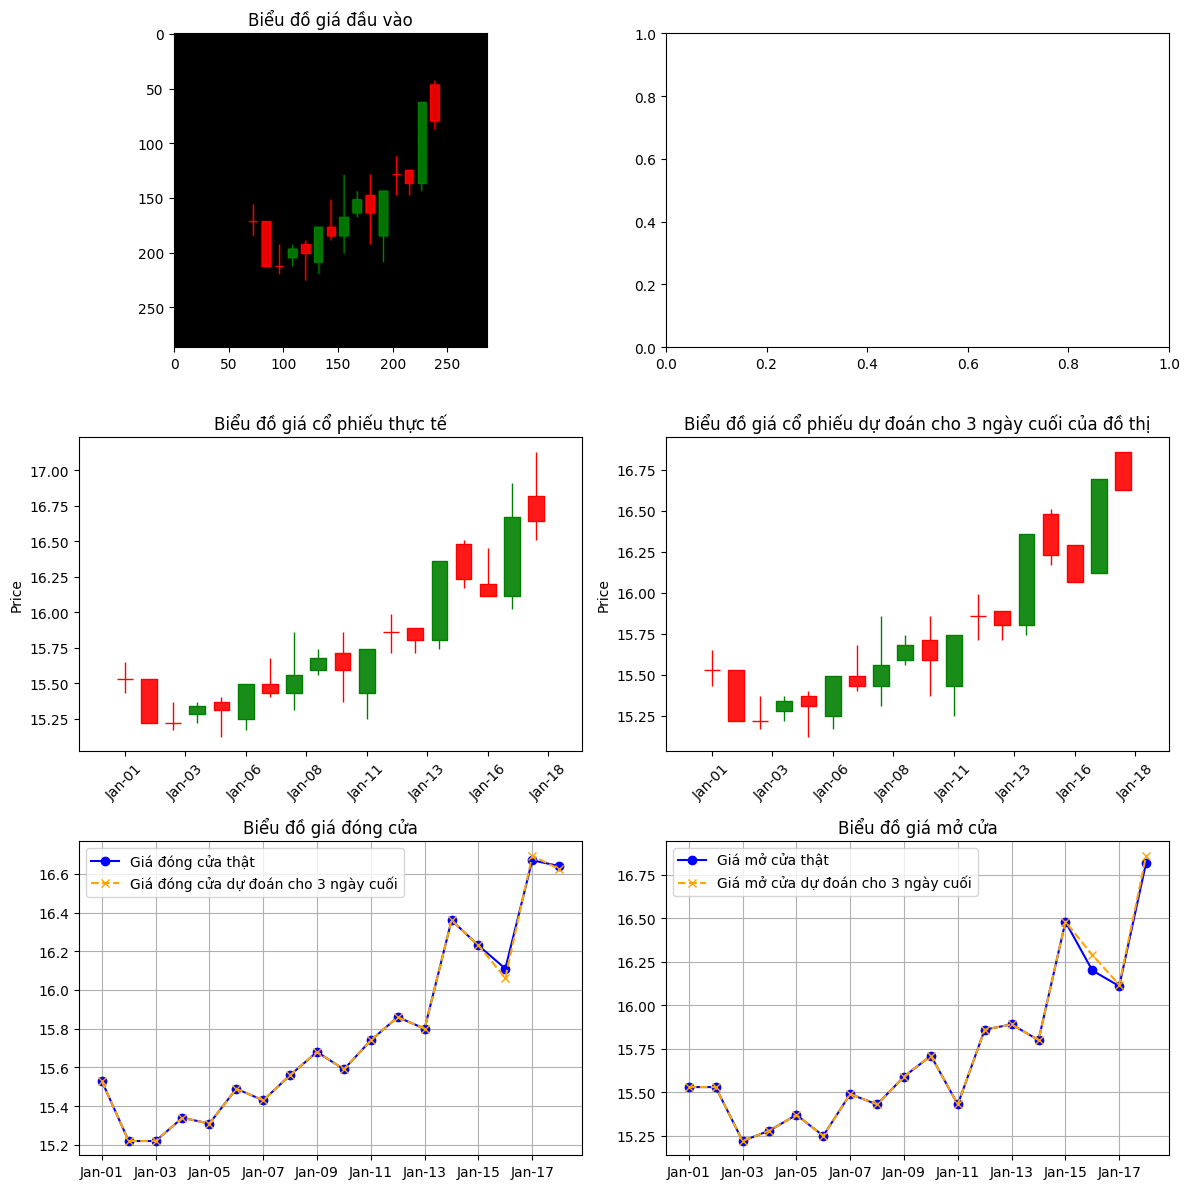

In [28]:
index = 200
print(f"real: {y_dataset_test_1[index]}")
print(f"prediction: {prediction_for_test[index]}")
type_of_output = "open_and_close"
draw_prediction(
    x_dataset_test[index], 
    y_dataset_test[index], 
    prediction_for_test[index], 
    show_x_orginal_candle=True,
    show_prediction_candle=True, 
    show_original_candle=True,
    show_close_compare=True,
    show_open_compare=True,
    type_of_output=type_of_output,
    draw_beside=True,
    print_image=True)

In [32]:
folder_save_image_predict = f"{dataset_folder}/output_prediction_image_{dataset_test_folder}"

In [33]:
folder_save_image_predict

'./fpt_dataset_10_4_3_2014_2024_test_/output_prediction_image_dataset_test_1_of_model_5'

In [34]:
# index = 0
print_all = input("Print all? (y/n): ").lower()
type_of_output = "open_and_close"
if print_all[0] == "y":
    for index in range(len(y_dataset_test)):
        if index % 10 == 0:
            print(f"Save: {index}/{len(y_dataset_test)} images")
        print(f"real: {y_dataset_test_1[index]}")
        print(f"prediction: {prediction_for_test[index]}")
        draw_prediction(
            x_dataset_test[index], 
            y_dataset_test[index], 
            prediction_for_test[index], 
            show_x_orginal_candle=True,
            show_prediction_candle=True, 
            show_original_candle=True,
            show_close_compare=True,
            show_open_compare=True,
            type_of_output=type_of_output,
            draw_beside=True,
            save_image=f"{folder_save_image_predict}/predict_{index}.png",
            print_image=False)

Save: 0/272 images
real: [[ 0.67491564 -0.33936652]
 [-0.83798883 -0.68104427]
 [-0.56338028  0.        ]]
prediction: [[-0.14892116 -0.2951456 ]
 [-0.2785862  -0.44579494]
 [-0.2636477  -0.38401258]]
real: [[-0.48169557 -0.48402711]
 [ 0.48402711  0.97276265]
 [ 0.          0.        ]]
prediction: [[-0.12624861 -0.04554398]
 [ 0.03844529  0.07996047]
 [ 0.26953533  0.22449172]]
real: [[-1.22458685  0.62028703]
 [ 0.          0.42306298]
 [-0.31295137 -2.28695234]]
prediction: [[ 0.03371635  0.17881998]
 [-0.21102959 -0.29775897]
 [-0.5907363  -0.6093326 ]]
real: [[2.31244958 0.13747594]
 [4.44152431 6.86436024]
 [0.37745345 2.23535457]]
prediction: [[ 2.4060316   0.4855841 ]
 [ 4.4288535   3.9994264 ]
 [-0.07759809  2.954019  ]]
real: [[ 0.64724919  1.21390473]
 [-0.91103966  0.        ]
 [ 0.9194159   0.67236053]]
prediction: [[0.3083242  1.0434186 ]
 [0.36067486 0.35451886]
 [0.49448958 0.23423722]]
real: [[ 0.          1.00783875]
 [ 0.99778271  0.99778271]
 [ 0.         -0.987925